# EDA sobre los datos de Taxi and Limousine Commission (TLC_NYC):

Se tomará una muestra de los datos para verificar la calidad de los mismos y determinar que infromación relevante se pude extraer de cada dataset. Solo se revisará un mes, luego se buscará la estrategia para lograr manipular el gran volumen de datos que están discriminados mensualmente desde el 2009 hasta el 2023 (completos desde el 2017) de taxis amarillos, taxis verdes y vehículos en alquiler. Que prestan servicios de transporte en vehículos ligeros. Lo más probable es quehagamos uso de los datos de los últimos 3 años o 5 máximo.

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import folium
import pandas as pd
warnings.filterwarnings('ignore')

## ***Eda inicial sobre la calidad de los datos:***

## 1. Abrir y explorar los datos de Taxis Amarillos:

In [4]:
"""
Use este comando para descargar el archivo a local:

# URL del archivo parquet
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet"

# Leer el archivo parquet desde la URL
df_Yellow_tripdata = pd.read_parquet(url)

"""

df_Yellow_tripdata = pd.read_parquet('../Datasets/TLC_NYC/1. yellow_tripdata_2023-12.parquet')
df_Yellow_tripdata

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-12-01 00:06:06,2023-12-01 00:15:47,0.0,1.10,1.0,N,230,48,1,10.00,3.5,0.5,1.50,0.0,1.0,16.50,2.5,0.0
1,1,2023-12-01 00:22:26,2023-12-01 00:28:53,0.0,1.50,1.0,N,142,238,1,9.30,3.5,0.5,2.85,0.0,1.0,17.15,2.5,0.0
2,1,2023-12-01 00:59:44,2023-12-01 01:13:22,2.0,2.20,1.0,N,114,186,1,13.50,3.5,0.5,3.00,0.0,1.0,21.50,2.5,0.0
3,2,2023-12-01 00:22:17,2023-12-01 00:30:59,1.0,0.66,1.0,N,79,79,2,7.20,1.0,0.5,0.00,0.0,1.0,12.20,2.5,0.0
4,2,2023-12-01 00:18:16,2023-12-01 00:25:32,2.0,2.20,1.0,N,229,263,1,11.40,1.0,0.5,2.00,0.0,1.0,18.40,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3376562,2,2023-12-31 23:04:34,2023-12-31 23:13:58,NaN,1.34,NaN,None,233,163,0,12.08,0.0,0.5,0.00,0.0,1.0,16.08,NaN,NaN
3376563,2,2023-12-31 23:08:15,2023-12-31 23:08:23,NaN,0.00,NaN,None,48,48,0,25.98,0.0,0.5,0.00,0.0,1.0,27.48,NaN,NaN
3376564,2,2023-12-31 23:16:15,2023-12-31 23:30:28,NaN,3.71,NaN,None,196,198,0,16.68,0.0,0.5,0.00,0.0,1.0,18.18,NaN,NaN
3376565,2,2023-12-31 23:21:58,2023-12-31 23:34:29,NaN,5.20,NaN,None,140,148,0,19.64,0.0,0.5,0.00,0.0,1.0,23.64,NaN,NaN


### 1.1. Columnas del dataset:

In [5]:
df_Yellow_tripdata.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

### 1.2. Diccionario de datos:

| Campo                  | Descripción                                                                                   |
|------------------------|-----------------------------------------------------------------------------------------------|
| VendorID               | Un código que indica el proveedor de TPEP que proporcionó el registro. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.|
| tpep_pickup_datetime   | La fecha y hora en que el taxímetro se activó.                                                 |
| tpep_dropoff_datetime  | La fecha y hora en que el taxímetro se desactivó.                                              |
| Passenger_count        | El número de pasajeros en el vehículo. Este valor es ingresado por el conductor.               |
| Trip_distance          | La distancia total del viaje en millas reportada por el taxímetro.                             |
| PULocationID           | Zona de taxi TLC en la que se activó el taxímetro.                                            |
| DOLocationID           | Zona de taxi TLC en la que se desactivó el taxímetro.                                         |
| RateCodeID             | El código de tarifa final vigente al final del viaje. 1= Tarifa estándar, 2= JFK, 3= Newark, 4= Nassau o Westchester, 5= Tarifa negociada, 6= Viaje en grupo.|
| Store_and_fwd_flag     | Esta bandera indica si el registro del viaje se almacenó en la memoria del vehículo antes de enviarlo al proveedor, también conocido como "almacenar y reenviar," porque el vehículo no tenía conexión al servidor. Y= viaje almacenado y reenviado, N= no es un viaje almacenado y reenviado.|
| Payment_type           | Un código numérico que indica cómo pagó el pasajero por el viaje. 1= Tarjeta de crédito, 2= Efectivo, 3= Sin cargo, 4= Disputa, 5= Desconocido, 6= Viaje anulado.|
| Fare_amount            | La tarifa calculada por tiempo y distancia según el taxímetro.                                |
| Extra                  | Extras varios y recargos. Actualmente, esto solo incluye los recargos de $0.50 y $1 por hora pico y nocturnos.|
| MTA_tax               | $0.50 de impuesto MTA que se activa automáticamente según la tarifa medida en uso.            |
| Improvement_surcharge  | Recargo de mejora de $0.30 aplicado a los viajes al comienzo del recorrido. El recargo de mejora comenzó a aplicarse en 2015.|
| Tip_amount             | Monto de propina. Este campo se completa automáticamente para propinas con tarjeta de crédito. Las propinas en efectivo no están incluidas.|
| Tolls_amount           | Monto total de todos los peajes pagados durante el viaje.                                      |
| Total amount           | El monto total cobrado a los pasajeros. No incluye propinas en efectivo.                       |
| Congestion_Surcharge   | Monto total recaudado en el viaje por el recargo de congestión del estado de Nueva York (NYS).  |
| Airport_fee            | $1.25 por recogida solo en los aeropuertos LaGuardia y John F. Kennedy.                         |


TPEP es un acrónimo que se refiere al Programa de Tecnología de Punto de Entrada de Taxi (Taxicab Passenger Enhancement Program, en inglés). Este programa se utiliza en el contexto de servicios de taxi en la ciudad de Nueva York. El término TPEP suele asociarse con el sistema de registro y seguimiento electrónico utilizado en los taxis para mejorar la experiencia del pasajero y modernizar la gestión de los viajes en taxi.

### 1.4. Resumen de contenido de tipos de datos:

In [6]:
df_Yellow_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376567 entries, 0 to 3376566
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

### 1.5. Descripción estadística de los datos numéricos:

In [7]:
df_Yellow_tripdata.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.376567e+06,3376567,3376567,3.196564e+06,3.376567e+06,3.196564e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.376567e+06,3.196564e+06,3.196564e+06
mean,1.750038e+00,2023-12-15 04:52:38.915836,2023-12-15 05:10:48.484536,1.408162e+00,3.676258e+00,1.793480e+00,1.650829e+02,1.639242e+02,1.169011e+00,1.966690e+01,1.477652e+00,4.828689e-01,3.517045e+00,5.766042e-01,9.758713e-01,2.854158e+01,2.269969e+00,1.370205e-01
min,1.000000e+00,2002-12-31 22:16:54,2003-01-01 15:02:08,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.087300e+03,-3.917000e+01,-5.000000e-01,-8.000000e+01,-7.000000e+01,-1.000000e+00,-1.094050e+03,-2.500000e+00,-1.750000e+00
25%,1.000000e+00,2023-12-07 23:42:14,2023-12-07 23:58:36.500000,1.000000e+00,1.000000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-12-14 17:55:22,2023-12-14 18:17:28,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.800000e+00,0.000000e+00,1.000000e+00,2.140000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-12-21 15:34:58,2023-12-21 15:56:21,2.000000e+00,3.250000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.330000e+01,2.500000e+00,5.000000e-01,4.500000e+00,0.000000e+00,1.000000e+00,3.156000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2024-01-03 19:42:57,2024-01-03 20:15:55,9.000000e+00,1.617261e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,2.320110e+03,5.168000e+01,4.217000e+01,4.174000e+03,1.613800e+02,1.000000e+00,4.269160e+03,2.500000e+00,1.750000e+00
std,4.358471e-01,NaN,NaN,9.109082e-01,1.541572e+02,8.331995e+00,6.430205e+01,6.966056e+01,5.956539e-01,1.896329e+01,1.813181e+00,1.205828e-01,4.727680e+00,2.232990e+00,2.169682e-01,2.383694e+01,8.078145e-01,4.799781e-01


### 1.6. Datos Nulos:

In [8]:
df_Yellow_tripdata.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          180003
trip_distance                 0
RatecodeID               180003
store_and_fwd_flag       180003
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     180003
Airport_fee              180003
dtype: int64

se debe revisar si es probable que el número de pasajeros no se registre con frecuencia cuando es solo 1 quien toma el servicio; no osbstante podría imputarse este valor a los nulos con la moda o el promedio por servicio. Los datos de impuesto por congestion y bono por ir al aeropuerto pueden imputarse al revisar 1ero. Si al total de la tarifa le falta este valor y 2do. si el vh transitó en horario pico de congestion y/o fué al aeropuerto. (Podría suponerse también que no se generó el cobro de estos valores e imputar como cero "0").

Es probable que se debe unir a los datos de "Taxi_Zones" para dibujar los recorridos o ubicar los servicios.

### 1.7. Valores Duplicados:

In [9]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_Yellow_tripdata.duplicated())
print("Hay un total de ",duplicates_count," duplicados en los datos de taxis amarillos")

Hay un total de  0  duplicados en los datos de taxis amarillos


### 1.8. Búsqueda de Outliers:

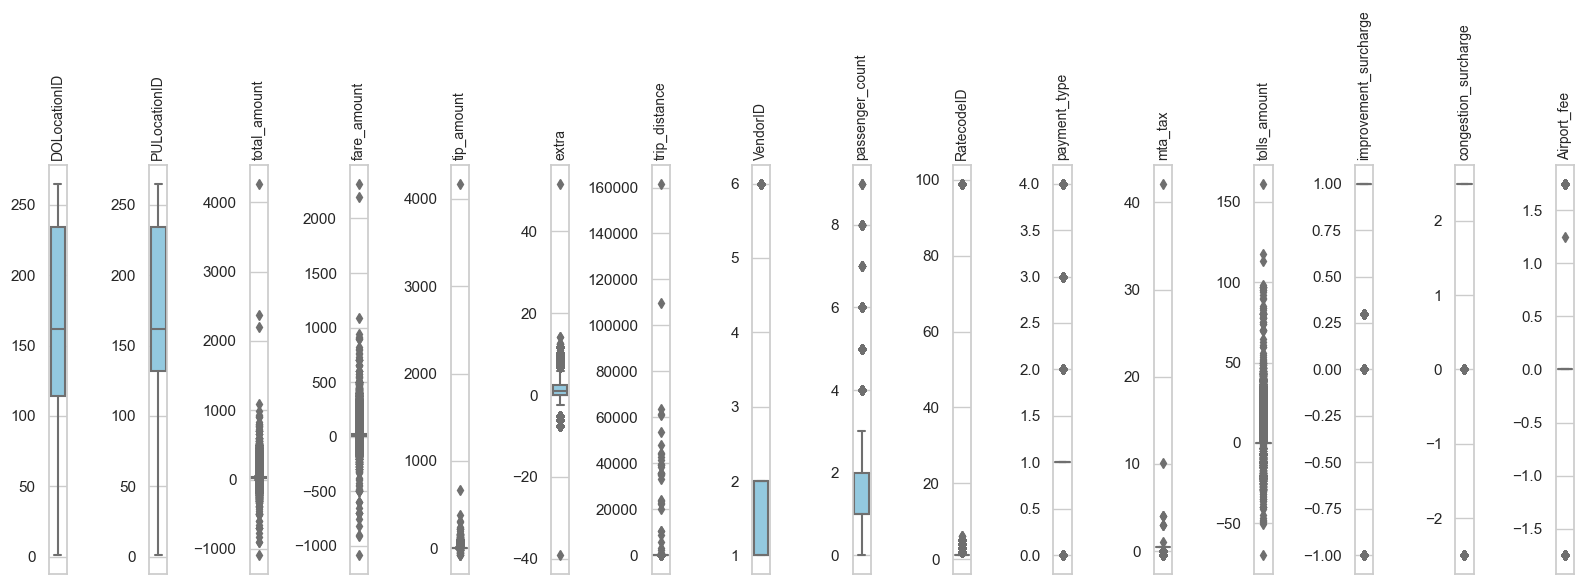

In [10]:

# Selecciona solo las columnas numéricas
df_numerical = df_Yellow_tripdata.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

Observaciones:

* Los datos de localización infieren que podría existir una concentración de servicios en una zona o distrito en particular en NYC.
* Se deben revisar los montos de tarifas, impuestos o extras que están con valores negativos, es probable que requieran convertirse a valor absoluto o se trate de devoluciones (esto último no parece considerarse).
* se tiene un outliers de un servicio de alto recorrido con alto precio.
* se tienen outliers de pasajeros que toman el servicio con 4 pasajeros o más.
* Hay errores en las tarifas de algunos impuestos.

### 1.9. Revisión de valores en columnas relevantes:

In [11]:
Columnas=df_Yellow_tripdata.columns
for i in Columnas:
    print(i,": ",df_Yellow_tripdata[i].unique())
    print('------------------------------------')


VendorID :  [1 2 6]
------------------------------------
tpep_pickup_datetime :  <DatetimeArray>
['2023-12-01 00:06:06', '2023-12-01 00:22:26', '2023-12-01 00:59:44',
 '2023-12-01 00:22:17', '2023-12-01 00:18:16', '2023-12-01 00:13:17',
 '2023-12-01 00:17:09', '2023-12-01 00:40:49', '2023-12-01 00:19:04',
 '2023-12-01 00:08:39',
 ...
 '2023-12-31 23:10:01', '2023-12-31 23:10:50', '2023-12-31 23:28:32',
 '2023-12-31 23:04:49', '2023-12-31 23:21:46', '2023-12-31 23:44:16',
 '2023-12-31 23:01:30', '2023-12-31 23:21:16', '2023-12-31 23:28:52',
 '2023-12-31 23:16:15']
Length: 1666104, dtype: datetime64[us]
------------------------------------
tpep_dropoff_datetime :  <DatetimeArray>
['2023-12-01 00:15:47', '2023-12-01 00:28:53', '2023-12-01 01:13:22',
 '2023-12-01 00:30:59', '2023-12-01 00:25:32', '2023-12-01 00:23:53',
 '2023-12-01 00:33:31', '2023-12-01 00:44:10', '2023-12-01 00:34:36',
 '2023-12-01 00:16:18',
 ...
 '2024-01-01 00:08:41', '2023-12-31 23:31:51', '2024-01-01 00:02:58',
 '20

Se debe tener presente los valos "NaN" en "passenger_count", RatecodeID, "congestion_surcharge", "Airport_fee" y "None" en "store_and_fwd_flag". Los cuales ya feuron contados en los nulos.

## 2. Abrir y explorar los datos de Taxis Verdes:

In [12]:
"""
Use este comando para descargar el archivo a local:

# URL del archivo parquet
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2024-01.parquet"

# Leer el archivo parquet desde la URL
df_Green_tripdata = pd.read_parquet(url)

"""

df_Green_tripdata = pd.read_parquet('../Datasets/TLC_NYC/2. green_tripdata_2023-12.parquet')
df_Green_tripdata

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-12-01 00:27:37,2023-12-01 00:42:48,N,1.0,74,243,1.0,4.80,22.60,1.0,0.5,5.02,0.00,NaN,1.0,30.12,1.0,1.0,0.0
1,1,2023-12-01 00:42:57,2023-12-01 00:56:16,N,1.0,80,25,2.0,3.60,19.10,1.0,1.5,4.30,0.00,NaN,1.0,25.90,1.0,1.0,0.0
2,2,2023-12-01 00:29:51,2023-12-01 00:49:38,N,1.0,70,83,1.0,2.07,18.40,1.0,0.5,0.00,0.00,NaN,1.0,20.90,2.0,1.0,0.0
3,2,2023-12-01 00:09:57,2023-12-01 00:36:51,N,1.0,112,106,1.0,8.66,38.70,1.0,0.5,8.24,0.00,NaN,1.0,49.44,1.0,1.0,0.0
4,2,2023-12-01 01:02:41,2023-12-01 01:11:20,N,1.0,129,179,1.0,2.74,14.20,1.0,0.5,0.00,0.00,NaN,1.0,16.70,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64210,2,2023-12-31 22:15:00,2023-12-31 22:35:00,None,NaN,97,37,NaN,9.87,20.28,0.0,0.0,4.26,0.00,NaN,1.0,25.54,NaN,NaN,NaN
64211,2,2023-12-31 23:17:00,2023-12-31 23:53:00,None,NaN,116,37,NaN,12.07,55.38,0.0,0.0,12.66,6.94,NaN,1.0,75.98,NaN,NaN,NaN
64212,2,2023-12-31 23:21:00,2023-12-31 23:33:00,None,NaN,65,80,NaN,3.84,16.93,0.0,0.0,3.59,0.00,NaN,1.0,21.52,NaN,NaN,NaN
64213,2,2023-12-31 23:15:00,2023-12-31 23:40:00,None,NaN,36,65,NaN,6.18,30.01,0.0,0.0,6.20,0.00,NaN,1.0,37.21,NaN,NaN,NaN


### 2.1. Columnas del dataset:

In [13]:
df_Green_tripdata.columns

Index(['VendorID', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

Tiene los mismos datos de taxis amarillos excepto el campo de recogida de aeropuerto (fuera de su jurisdicción):

Campo extra "Trip_Type":

- 1= Street-hail (captación en la calle): Indica que el pasajero fue recogido directamente de la calle.

- 2= Dispatch (despacho): Indica que el viaje fue solicitado y coordinado a través de un servicio de despacho, una aplicación móvil u otro método de solicitud previa.

### 2.2. Diccionario de datos:

| Campo                  | Descripción                                                                                   |
|------------------------|-----------------------------------------------------------------------------------------------|
| VendorID               | Un código que indica el proveedor de TPEP que proporcionó el registro. 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.|
| tpep_pickup_datetime   | La fecha y hora en que el taxímetro se activó.                                                 |
| tpep_dropoff_datetime  | La fecha y hora en que el taxímetro se desactivó.                                              |
| Passenger_count        | El número de pasajeros en el vehículo. Este valor es ingresado por el conductor.               |
| Trip_distance          | La distancia total del viaje en millas reportada por el taxímetro.                             |
| PULocationID           | Zona de taxi TLC en la que se activó el taxímetro.                                            |
| DOLocationID           | Zona de taxi TLC en la que se desactivó el taxímetro.                                         |
| RateCodeID             | El código de tarifa final vigente al final del viaje. 1= Tarifa estándar, 2= JFK, 3= Newark, 4= Nassau o Westchester, 5= Tarifa negociada, 6= Viaje en grupo.|
| Store_and_fwd_flag     | Esta bandera indica si el registro del viaje se almacenó en la memoria del vehículo antes de enviarlo al proveedor, también conocido como "almacenar y reenviar," porque el vehículo no tenía conexión al servidor. Y= viaje almacenado y reenviado, N= no es un viaje almacenado y reenviado.|
| Payment_type           | Un código numérico que indica cómo pagó el pasajero por el viaje. 1= Tarjeta de crédito, 2= Efectivo, 3= Sin cargo, 4= Disputa, 5= Desconocido, 6= Viaje anulado.|
| Fare_amount            | La tarifa calculada por tiempo y distancia según el taxímetro.                                |
| Extra                  | Extras varios y recargos. Actualmente, esto solo incluye los recargos de $0.50 y $1 por hora pico y nocturnos.|
| MTA_tax               | $0.50 de impuesto MTA que se activa automáticamente según la tarifa medida en uso.            |
| Improvement_surcharge  | Recargo de mejora de $0.30 aplicado a los viajes al comienzo del recorrido. El recargo de mejora comenzó a aplicarse en 2015.|
| Tip_amount             | Monto de propina. Este campo se completa automáticamente para propinas con tarjeta de crédito. Las propinas en efectivo no están incluidas.|
| Tolls_amount           | Monto total de todos los peajes pagados durante el viaje.                                      |
| Total amount           | El monto total cobrado a los pasajeros. No incluye propinas en efectivo.                       |
| Congestion_Surcharge   | Monto total recaudado en el viaje por el recargo de congestión del estado de Nueva York (NYS).  |
| Trip_Type            | 1= Street-hail (captación en la calle): Indica que el pasajero fue recogido directamente de la calle.2= Dispatch (despacho): Indica que el viaje fue solicitado y coordinado a través de un servicio de despacho, una aplicación móvil u otro método de solicitud previa. |


### 2.4. Resumen de contenido de tipos de datos:

In [14]:
df_Green_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64215 entries, 0 to 64214
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64215 non-null  int32         
 1   lpep_pickup_datetime   64215 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64215 non-null  datetime64[us]
 3   store_and_fwd_flag     59303 non-null  object        
 4   RatecodeID             59303 non-null  float64       
 5   PULocationID           64215 non-null  int32         
 6   DOLocationID           64215 non-null  int32         
 7   passenger_count        59303 non-null  float64       
 8   trip_distance          64215 non-null  float64       
 9   fare_amount            64215 non-null  float64       
 10  extra                  64215 non-null  float64       
 11  mta_tax                64215 non-null  float64       
 12  tip_amount             64215 non-null  float64       
 13  t

### 2.5. Descripción estadística de los datos numéricos:

In [15]:
df_Green_tripdata.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,64215.000000,64215,64215,59303.000000,64215.000000,64215.000000,59303.000000,64215.000000,64215.000000,64215.000000,64215.000000,64215.000000,64215.000000,0.0,64215.000000,64215.000000,59303.000000,59301.000000,59303.000000
mean,1.866433,2023-12-15 13:30:32.619792,2023-12-15 13:50:52.158280,1.167125,96.329129,138.956910,1.297354,25.054974,18.780092,0.885981,0.570754,2.281606,0.228476,NaN,0.990139,24.261032,1.343035,1.036020,0.748651
min,1.000000,2023-11-24 21:03:34,2023-11-24 21:22:29,1.000000,1.000000,1.000000,0.000000,0.000000,-220.000000,-5.000000,-0.500000,-0.010000,0.000000,NaN,-1.000000,-221.000000,1.000000,1.000000,-2.750000
25%,2.000000,2023-12-08 07:35:37.500000,2023-12-08 07:54:51,1.000000,74.000000,74.000000,1.000000,1.120000,10.000000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.600000,1.000000,1.000000,0.000000
50%,2.000000,2023-12-15 07:21:03,2023-12-15 07:41:57,1.000000,75.000000,138.000000,1.000000,1.870000,14.200000,0.000000,0.500000,1.880000,0.000000,NaN,1.000000,18.980000,1.000000,1.000000,0.000000
75%,2.000000,2023-12-21 23:17:00,2023-12-21 23:37:48.500000,1.000000,116.000000,223.000000,1.000000,3.300000,21.200000,1.000000,0.500000,3.550000,0.000000,NaN,1.000000,27.940000,2.000000,1.000000,2.750000
max,2.000000,2023-12-31 23:59:19,2024-01-01 14:56:28,99.000000,265.000000,265.000000,7.000000,118988.710000,1618.600000,10.000000,4.250000,150.000000,29.500000,NaN,1.000000,1622.600000,4.000000,2.000000,2.750000
std,0.340189,NaN,NaN,0.967889,57.829862,76.584323,0.939167,1027.305946,23.267441,1.355836,0.393163,3.157187,1.316029,NaN,0.124247,24.426750,0.506120,0.186341,1.224097


### 2.6. Datos Nulos:

In [16]:
df_Green_tripdata.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4912
RatecodeID                4912
PULocationID                 0
DOLocationID                 0
passenger_count           4912
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                64215
improvement_surcharge        0
total_amount                 0
payment_type              4912
trip_type                 4914
congestion_surcharge      4912
dtype: int64

Se tienene las mismas consideraciones respecto de los taxis amarillos sobre el pago de la tarifa de congestión (nulo puede significar que no se pagó) o se puede imputar si el servicio se hizo en horario pico.
Se observa una columna sin valores.

### 2.7. Valores Duplicados:

In [17]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_Green_tripdata.duplicated())
print("Hay un total de ",duplicates_count," duplicados en losdatos de taxis verdes")

Hay un total de  0  duplicados en losdatos de taxis verdes


### 2.8. Búsqueda de Outliers:

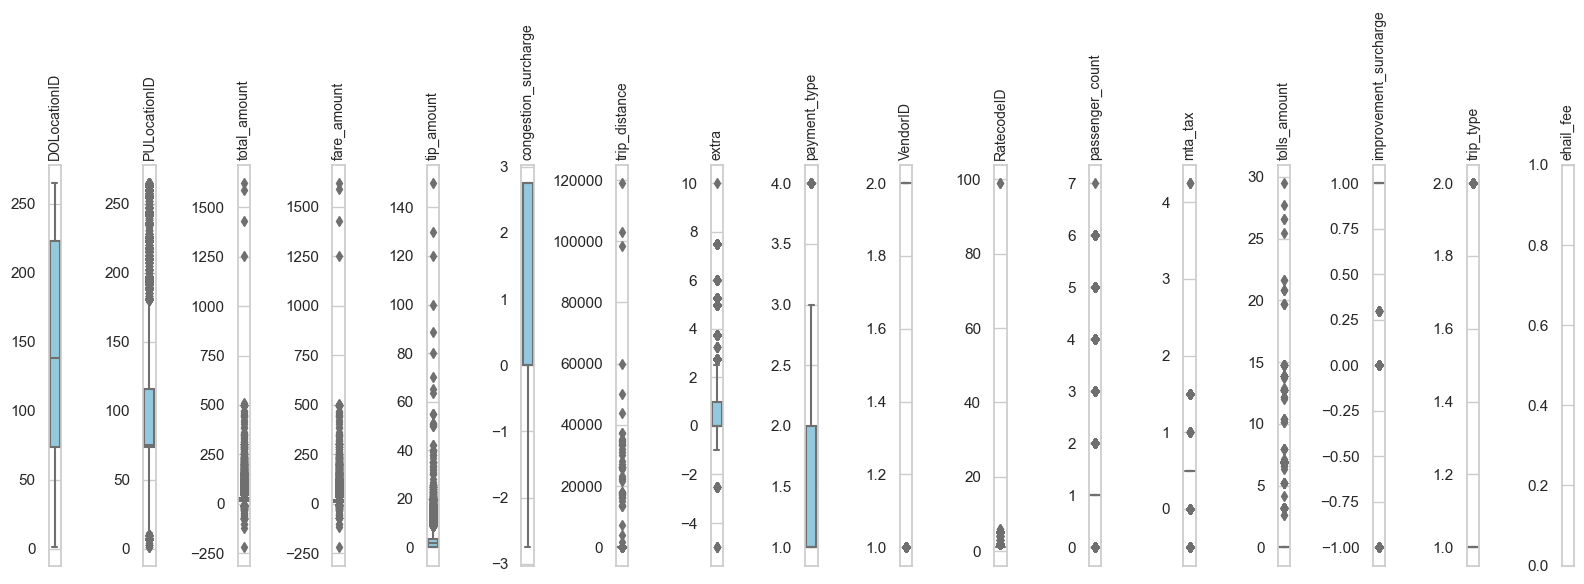

In [18]:
# Selecciona solo las columnas numéricas
df_numerical = df_Green_tripdata.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

Observaciones:

* Los datos de localización infieren que podría existir una concentración de servicios en una zona o distrito en particular en NYC en especial en el destino del servicio.
* Se deben revisar los montos de tarifas, impuestos o extras que están con valores negativos, es probable que requieran convertirse a valor absoluto o se trate de devoluciones (esto último no parece considerarse).
* el número de pasajeros es bastante variable.
* Hay errores en las tarifas de algunos impuestos.
* El costo de las tarifas es bastante variable.

### 2.9. Revisión de valores en columnas relevantes:

In [19]:
Columnas=df_Green_tripdata.columns
for i in Columnas:
    print(i,": ",df_Green_tripdata[i].unique())
    print('------------------------------------')


VendorID :  [2 1]
------------------------------------
lpep_pickup_datetime :  <DatetimeArray>
['2023-12-01 00:27:37', '2023-12-01 00:42:57', '2023-12-01 00:29:51',
 '2023-12-01 00:09:57', '2023-12-01 01:02:41', '2023-11-30 23:06:05',
 '2023-12-01 00:44:18', '2023-12-01 00:02:33', '2023-12-01 00:06:04',
 '2023-12-01 00:46:31',
 ...
 '2023-12-31 22:12:00', '2023-12-31 22:03:00', '2023-12-31 22:05:00',
 '2023-12-31 22:15:00', '2023-12-31 22:08:00', '2023-12-31 22:00:00',
 '2023-12-31 23:17:00', '2023-12-31 23:21:00', '2023-12-31 23:15:00',
 '2023-12-31 23:09:00']
Length: 62452, dtype: datetime64[us]
------------------------------------
lpep_dropoff_datetime :  <DatetimeArray>
['2023-12-01 00:42:48', '2023-12-01 00:56:16', '2023-12-01 00:49:38',
 '2023-12-01 00:36:51', '2023-12-01 01:11:20', '2023-11-30 23:11:58',
 '2023-12-01 00:50:12', '2023-12-01 01:00:28', '2023-12-01 00:25:49',
 '2023-12-01 01:11:05',
 ...
 '2023-12-31 22:27:00', '2023-12-31 22:40:00', '2023-12-31 22:51:00',
 '2023-1

Se aprecian los valores NaN ya contados en nulos y los valores negativos que no son normales en campos de precio.

### 3. Abrir y explorar los datos de Vehículos de Alquiler:

In [21]:
df_fhv_tripdata = pd.read_parquet('../Datasets/TLC_NYC/3. fhv_tripdata_2023-12.parquet')
df_fhv_tripdata

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2023-12-01 00:15:00,2023-12-01 00:57:00,NaN,NaN,NaN,B00009
1,B00009,2023-12-01 00:20:00,2023-12-01 00:59:00,NaN,NaN,NaN,B00009
2,B00013,2023-12-01 00:27:25,2023-12-01 00:46:00,NaN,NaN,NaN,B00053
3,B00013,2023-12-01 00:00:00,2023-12-01 00:32:00,NaN,NaN,NaN,B00381
4,B00013,2023-12-01 00:45:53,2023-12-01 01:33:00,NaN,NaN,NaN,B00013
...,...,...,...,...,...,...,...
1376743,B03505,2023-12-31 23:28:48,2023-12-31 23:31:58,NaN,198.0,NaN,B03505
1376744,B03505,2023-12-31 23:02:27,2023-12-31 23:21:31,NaN,82.0,NaN,B03505
1376745,B03505,2023-12-31 23:36:24,2024-01-01 00:00:25,NaN,251.0,NaN,B03505
1376746,B03529,2023-12-31 23:15:42,2023-12-31 23:26:29,NaN,61.0,NaN,B03404


### 3.1. Columnas del dataset:

In [22]:
df_fhv_tripdata.columns

Index(['dispatching_base_num', 'pickup_datetime', 'dropOff_datetime',
       'PUlocationID', 'DOlocationID', 'SR_Flag', 'Affiliated_base_number'],
      dtype='object')

### 3.2. Diccionario de datos:

| Nombre del Campo | Descripción |
| --- | --- |
| Dispatching_base_num | Número de Licencia de la Base de la TLC que despachó el viaje |
| Pickup_datetime | La fecha y hora de recogida del viaje |
| DropOff_datetime | La fecha y hora de entrega del viaje |
| PULocationlD | Zona de Taxi de la TLC en la que comenzó el viaje |
| DO LocationID | Zona de Taxi de la TLC en la que terminó el viaje |
| SR_Flag | Indica si el viaje fue parte de una cadena de viajes compartidos ofrecida por una empresa High Volume FHV (por ejemplo, Uber Pool, Lyft Line). Para viajes compartidos, el valor es 1. Para viajes no compartidos, este campo es nulo. NOTA: Para la mayoría de las empresas High Volume FHV, solo se marcan como compartidos aquellos viajes que fueron solicitados Y coincidieron con otra solicitud de viaje compartido durante el curso del viaje. Sin embargo, Lyft (números de licencia de base 802510 + B02844) también marca los viajes en los que se solicitó un viaje compartido pero no se emparejó con éxito a otro pasajero para compartir el viaje. Por lo tanto, los registros de viajes con SR_Flag=1 de esas dos bases podrían indicar YA SEA un primer viaje en una cadena de viajes compartidos O un viaje para el cual se solicitó un viaje compartido pero nunca se emparejó. Los usuarios deben anticipar un recuento excesivo de viajes compartidos completados con éxito por Lyft. |

### 3.4. Resumen de contenido de tipos de datos:

In [23]:
df_fhv_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1376748 entries, 0 to 1376747
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   dispatching_base_num    1376748 non-null  object        
 1   pickup_datetime         1376748 non-null  datetime64[us]
 2   dropOff_datetime        1376748 non-null  datetime64[us]
 3   PUlocationID            239254 non-null   float64       
 4   DOlocationID            1166106 non-null  float64       
 5   SR_Flag                 0 non-null        float64       
 6   Affiliated_base_number  1376748 non-null  object        
dtypes: datetime64[us](2), float64(3), object(2)
memory usage: 73.5+ MB


***Demasiados datos de Location ID nulos, no hay datos de tarifas, No se considera relevante el data set***

## 4. Abrir y explorar los datos de Alquiler de Vehículos de Gran Volumen:

In [24]:
"""
Use este comando para descargar el archivo a local:

# URL del archivo parquet
url = "https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-01.parquet"

# Leer el archivo parquet desde la URL
df_fhvhv_tripdata = pd.read_parquet(url)

"""

df_fhvhv_tripdata = pd.read_parquet('../Datasets/TLC_NYC/4. fhvhv_tripdata_2023-12.parquet')
df_fhvhv_tripdata

,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,...,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
0,HV0003,B03404,B03404,2023-11-30 23:58:32,2023-12-01 00:02:29,2023-12-01 00:03:42,2023-12-01 00:26:21,13,143,4.840,...,3.86,2.75,0.0,3.00,29.55,N,N,N,N,N
1,HV0003,B03404,B03404,2023-12-01 00:37:55,2023-12-01 00:43:29,2023-12-01 00:44:37,2023-12-01 00:54:01,163,238,2.030,...,2.03,2.75,0.0,0.00,15.42,N,N,N,N,N
2,HV0003,B03404,B03404,2023-11-30 23:56:12,2023-12-01 00:12:07,2023-12-01 00:12:26,2023-12-01 00:54:03,246,244,7.860,...,2.64,2.75,0.0,7.19,36.30,N,N,N,N,N
3,HV0003,B03404,B03404,2023-12-01 00:05:59,2023-12-01 00:09:35,2023-12-01 00:10:30,2023-12-01 00:39:52,231,245,14.350,...,5.00,2.75,0.0,0.00,35.42,N,N,N,N,N
4,HV0003,B03404,B03404,2023-12-01 00:16:09,2023-12-01 00:21:38,2023-12-01 00:22:08,2023-12-01 01:02:56,231,265,26.090,...,8.10,2.75,0.0,0.00,60.85,N,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20516292,HV0005,B03406,None,2023-12-31 23:35:57,NaT,2023-12-31 23:39:27,2023-12-31 23:48:05,17,49,1.581,...,0.94,0.00,0.0,0.00,7.00,N,N,N,N,N
20516293,HV0003,B03404,B03404,2023-12-31 23:18:14,2023-12-31 23:19:16,2023-12-31 23:21:17,2023-12-31 23:50:30,186,160,8.740,...,3.30,2.75,0.0,0.00,27.96,N,N,N,N,N
20516294,HV0003,B03404,B03404,2023-12-31 23:18:22,2023-12-31 23:21:40,2023-12-31 23:22:26,2023-12-31 23:26:17,228,228,0.530,...,0.79,0.00,0.0,0.00,5.74,N,N,N,N,N
20516295,HV0003,B03404,B03404,2023-12-31 22:58:13,2023-12-31 23:01:28,2023-12-31 23:03:17,2023-12-31 23:30:34,119,50,10.140,...,2.16,2.75,0.0,0.00,30.99,N,N,N,N,N


### 4.1. Columnas del dataset:

In [25]:
df_fhvhv_tripdata.columns

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag'],
      dtype='object')

No hay una columna con número de pasajeros.

### 4.2. Diccionario de datos:

| Nombre del Campo | Descripción |
| --- | --- |
| Hvfhs_license_num | El número de licencia de la base o negocio de HVFHS de TLC. A partir de septiembre de 2019, los licenciatarios de HVFHS son los siguientes: HV0002: Juno, HV0003: Uber, HV0004: Via, HV0005: Lyft |
| Dispatching_base_num | El Número de Licencia de la Base de TLC que despachó el viaje |
| Pickup_datetime | La fecha y hora de recogida del viaje |
| DropOff_datetime | La fecha y hora de entrega del viaje |
| PULocationlD | Zona de Taxi de la TLC en la que comenzó el viaje |
| DOLocationlD | Zona de Taxi de la TLC en la que terminó el viaje |
| originating_base_num | Número de la base que recibió la solicitud original de viaje |
| request_datetime | Fecha/hora en la que el pasajero solicitó ser recogido |
| on_scene_datetime | Fecha/hora en la que el conductor llegó al lugar de recogida (solo para Vehículos Accesibles) |
| trip_miles | Millas totales para el viaje del pasajero |
| trip_time | Tiempo total en segundos para el viaje del pasajero |
| base_passenger_fare | Tarifa base para el pasajero antes de peajes, propinas, impuestos y tarifas |
| tolls | Cantidad total de todos los peajes pagados en el viaje |
| bcf | Cantidad total recolectada en el viaje para el Fondo de Autos Negros |
| sales_tax | Cantidad total recolectada en el viaje para el impuesto sobre las ventas del estado de Nueva York |
| congestion_surcharge | Cantidad total recolectada en el viaje para el recargo de congestión del estado de Nueva York |
| airport_fee | $2.50 tanto para dejar como para recoger en los aeropuertos LaGuardia, Newark y John F. Kennedy |
| tips | Cantidad total de propinas recibidas del pasajero |
| driver_pay | Pago total al conductor (sin incluir peajes o propinas y neto de comisiones, recargos o impuestos) |
| shared_request_flag | ¿El pasajero aceptó un viaje compartido, independientemente de si se emparejaron? (Sí/No) |
| shared_match_flag | ¿El pasajero compartió el vehículo con otro pasajero que reservó por separado en algún momento durante el viaje? (Sí/No) |
| access_a_ride_flag | ¿Se administró el viaje en nombre de la Autoridad de Transporte Metropolitano (MTA)? (Sí/No) |
| wav_request_flag | ¿El pasajero solicitó un vehículo accesible para sillas de ruedas (WAV)? (Sí/No) |
| wav_match_flag | ¿El viaje se realizó en un vehículo accesible para sillas de ruedas (WAV)? (Sí/No) |

***Los vehículos de alquiler de gran volumen tiene datos extra con respecto de los demás df como datos de vehículo compartido y accesible a sillas de reueda***

### 4.4. Resumen de contenido de tipos de datos:

In [26]:
df_fhvhv_tripdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20516297 entries, 0 to 20516296
Data columns (total 24 columns):
 #   Column                Dtype         
---  ------                -----         
 0   hvfhs_license_num     object        
 1   dispatching_base_num  object        
 2   originating_base_num  object        
 3   request_datetime      datetime64[us]
 4   on_scene_datetime     datetime64[us]
 5   pickup_datetime       datetime64[us]
 6   dropoff_datetime      datetime64[us]
 7   PULocationID          int32         
 8   DOLocationID          int32         
 9   trip_miles            float64       
 10  trip_time             int64         
 11  base_passenger_fare   float64       
 12  tolls                 float64       
 13  bcf                   float64       
 14  sales_tax             float64       
 15  congestion_surcharge  float64       
 16  airport_fee           float64       
 17  tips                  float64       
 18  driver_pay            float64       
 19

### 5.5. Descripción estadística de los datos numéricos:

In [27]:
df_fhvhv_tripdata.describe()

,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay
count,20516297,14287139,20516297,20516297,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07,2.051630e+07
mean,2023-12-15 18:22:12.111775,2023-12-15 12:24:14.185189,2023-12-15 18:26:55.100840,2023-12-15 18:47:14.294780,1.388108e+02,1.422471e+02,5.099173e+00,1.219218e+03,2.618078e+01,1.191841e+00,7.505448e-01,2.163404e+00,1.052534e+00,2.129145e-01,1.252469e+00,2.025517e+01
min,2023-11-30 23:26:46,2023-11-30 22:47:01,2023-12-01 00:00:00,2023-12-01 00:02:44,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-5.653000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.388000e+01
25%,2023-12-08 09:07:05,2023-12-08 03:22:14,2023-12-08 09:10:41,2023-12-08 09:30:38,7.500000e+01,7.600000e+01,1.560000e+00,6.030000e+02,1.245000e+01,0.000000e+00,3.300000e-01,1.030000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.890000e+00
50%,2023-12-15 13:08:42,2023-12-15 01:16:58,2023-12-15 13:13:51,2023-12-15 13:36:43,1.400000e+02,1.410000e+02,2.988000e+00,9.810000e+02,1.964000e+01,0.000000e+00,5.400000e-01,1.640000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.501000e+01
75%,2023-12-22 19:34:25,2023-12-22 13:27:42.500000,2023-12-22 19:38:43,2023-12-22 19:58:29,2.100000e+02,2.160000e+02,6.350000e+00,1.569000e+03,3.156000e+01,0.000000e+00,8.900000e-01,2.700000e+00,2.750000e+00,0.000000e+00,0.000000e+00,2.544000e+01
max,2024-01-01 00:15:00,2023-12-31 23:59:57,2023-12-31 23:59:59,2024-01-01 06:04:47,2.650000e+02,2.650000e+02,4.388800e+02,3.958100e+04,2.447140e+03,9.957000e+01,6.791000e+01,2.191500e+02,1.100000e+01,6.900000e+00,2.033200e+02,1.761950e+03
std,NaN,NaN,NaN,NaN,7.484846e+01,7.788767e+01,5.952491e+00,8.892607e+02,2.293353e+01,4.089050e+00,7.007267e-01,1.848119e+00,1.333238e+00,7.001269e-01,3.602560e+00,1.744715e+01


***Se tiene basta infoación representativa en los campos de más interés***

### 4.6. Datos Nulos:

In [28]:
df_fhvhv_tripdata.isna().sum()

hvfhs_license_num             0
dispatching_base_num          0
originating_base_num    6229158
request_datetime              0
on_scene_datetime       6229158
pickup_datetime               0
dropoff_datetime              0
PULocationID                  0
DOLocationID                  0
trip_miles                    0
trip_time                     0
base_passenger_fare           0
tolls                         0
bcf                           0
sales_tax                     0
congestion_surcharge          0
airport_fee                   0
tips                          0
driver_pay                    0
shared_request_flag           0
shared_match_flag             0
access_a_ride_flag            0
wav_request_flag              0
wav_match_flag                0
dtype: int64

No se aprecian datos nulos represntativos y sobre la columna "on_scene_datetime" solo aplica a servicios con vehículos modificados para dscapacitados.

### 4.7. Valores Duplicados:

In [29]:
# Contar los valores duplicados en todas las columnas
duplicates_count = sum(df_fhvhv_tripdata.duplicated())
print("Hay un total de ",duplicates_count," duplicados en los datos de vehículos de alquiler de gran volumen")

Hay un total de  0  duplicados en los datos de vehículos de alquiler de gran volumen


### 4.8. Búsqueda de Outliers:

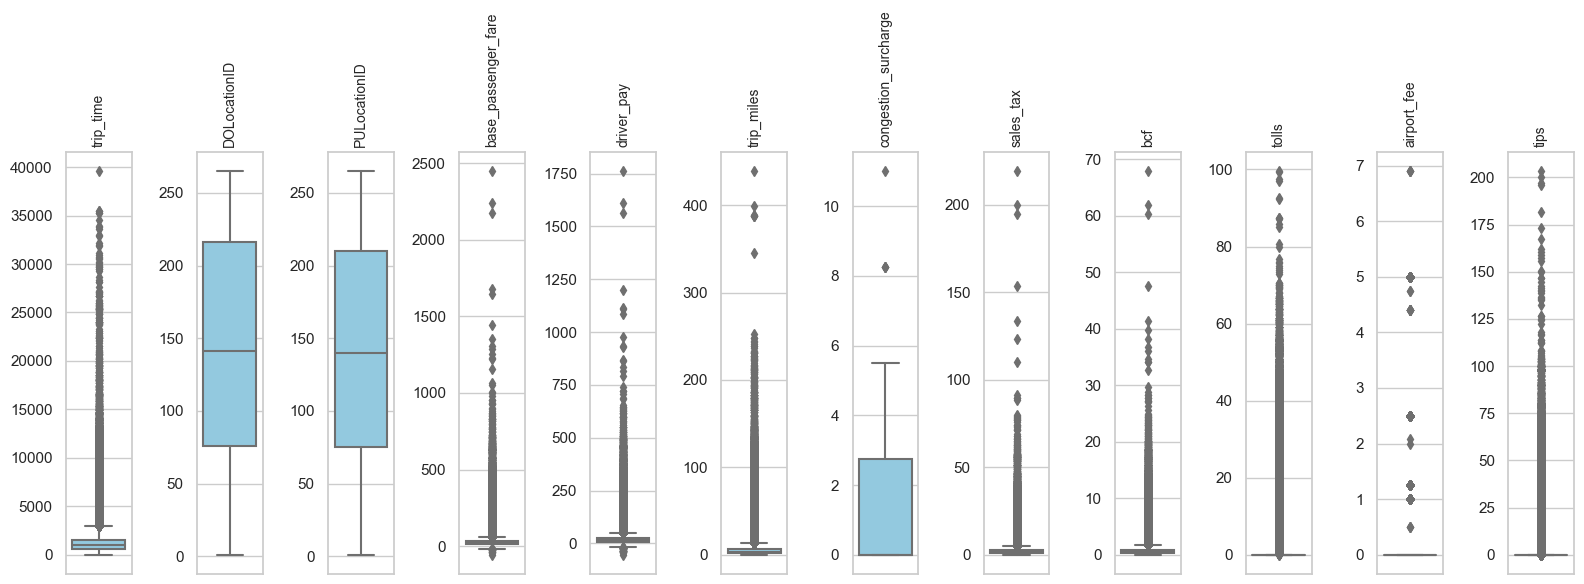

In [30]:
# Selecciona solo las columnas numéricas
df_numerical = df_fhvhv_tripdata.select_dtypes(include='number')

# Calcula el IQR (rango intercuartílico) para cada columna y ordénalas por el IQR
iqr_values = (df_numerical.quantile(0.75) - df_numerical.quantile(0.25)).sort_values(ascending=False)
sorted_columns = iqr_values.index

# Ordena las columnas en df_numerical de acuerdo con el orden de iqr_values
df_numerical = df_numerical[sorted_columns]


# Configura el estilo de Seaborn
sns.set(style="whitegrid")

# Tamaño de la figura y espaciado entre subtramas
plt.figure(figsize=(16, 6))
plt.subplots_adjust(wspace=0.4)  # Ajusta el espaciado horizontal entre subtramas

# Crea el gráfico de caja utilizando Seaborn
for i, column in enumerate(sorted_columns):
    ax = plt.subplot(1, len(sorted_columns), i+1)  # Subtrama para cada variable
    sns.boxplot(y=df_numerical[column], color='skyblue', ax=ax)
    ax.set_title(column, rotation=90, fontsize=10)  # Rotar el título y ajustar tamaño de fuente
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90)  # Rotar las etiquetas del eje x verticalmente

plt.tight_layout()
plt.show()

Observaciones:

* Los datos de localización infieren que los servicios se dispersan en toda la ciudad.
* Se deben revisar los montos de tarifas, impuestos o extras que están con valores negativos,aunque para este caso no son demasiados datos, al parecer esto está mucho mejor que en los dartos de taxis.
* El costo de las tarifas es bastante variable.

### 4.9. Revisón de valores en las columnas relevantes:

In [31]:
Columnas=df_fhvhv_tripdata.columns
for i in Columnas:
    print(i,": ",df_fhvhv_tripdata[i].unique())
    print('------------------------------------')


hvfhs_license_num :  ['HV0003' 'HV0005']
------------------------------------
dispatching_base_num :  ['B03404' 'B03406']
------------------------------------
originating_base_num :  ['B03404' None 'B03406' 'B03153' 'B02026' 'B00887' 'B01312' 'B03380']
------------------------------------
request_datetime :  <DatetimeArray>
['2023-11-30 23:58:32', '2023-12-01 00:37:55', '2023-11-30 23:56:12',
 '2023-12-01 00:05:59', '2023-12-01 00:16:09', '2023-11-30 23:55:49',
 '2023-12-01 00:25:04', '2023-12-01 00:41:55', '2023-12-01 00:55:06',
 '2023-12-01 00:28:19',
 ...
 '2023-12-31 23:50:42', '2023-12-31 23:55:46', '2023-12-31 23:57:15',
 '2023-12-31 23:50:10', '2023-12-31 23:57:32', '2023-12-31 23:55:01',
 '2023-12-31 23:57:09', '2023-12-31 23:56:49', '2023-12-31 23:57:51',
 '2023-12-31 23:50:08']
Length: 2628256, dtype: datetime64[us]
------------------------------------
on_scene_datetime :  <DatetimeArray>
['2023-12-01 00:02:29', '2023-12-01 00:43:29', '2023-12-01 00:12:07',
 '2023-12-01 00:09

Se aprecia dos tipos de licencias para este tipo de servicio, algunos valores None ya contados en los nulos y se recalca que no hay problemas de tarifas negativas como en los taxis.

## ***Eda Final sobre la calidad de la información Extraíble:***

### 1. Abrir datos limpios para análisis:

In [34]:
Servicios_Agrupados = pd.read_parquet('../DataClean/Servicios_Agrupados.parquet') # Union de taxis amarillos, verdes y UberLyft
Localización = pd.read_csv('../DataClean/Taxi_Zone.csv')                          # Geolocalización de los servicios

### 2. Porcentaje de la demanda atendida por tipo de servicio:

In [37]:
# Calular porcentajes por tipo de servicio
percentage = Servicios_Agrupados['service_type'].value_counts(normalize=True) * 100
percentage

service_type
UberLyft    85.551215
Yellow      13.909702
Green        0.539084
Name: proportion, dtype: float64

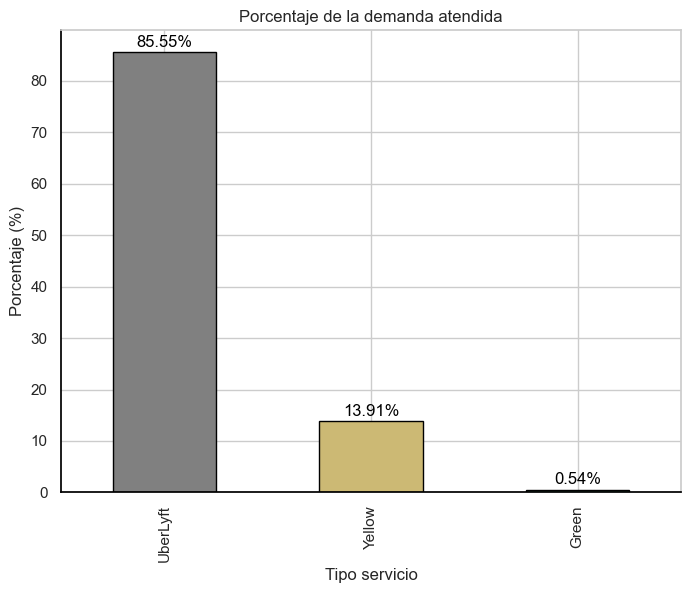

In [65]:
plt.figure(figsize=(8, 6))
colors = ['gray', 'y', 'g']  # Lista de colores para cada barra

# Graficar los valores únicos con colores personalizados
percentage.plot(kind='bar', color=colors, edgecolor='black')  # Ajustar el color del borde a negro

# Agregar etiquetas de valor en cada barra
for i, v in enumerate(percentage):
    plt.text(i, v + 1, f'{v:.2f}%', color='black', ha='center')

plt.xlabel('Tipo servicio')
plt.ylabel('Porcentaje (%)')
plt.title('Porcentaje de la demanda atendida')

# Ajustar el color de fondo del gráfico a blanco
plt.gcf().set_facecolor('white')

# Ajustar el color de los ejes a blanco
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.show()

### 3. Número de servicios por día:

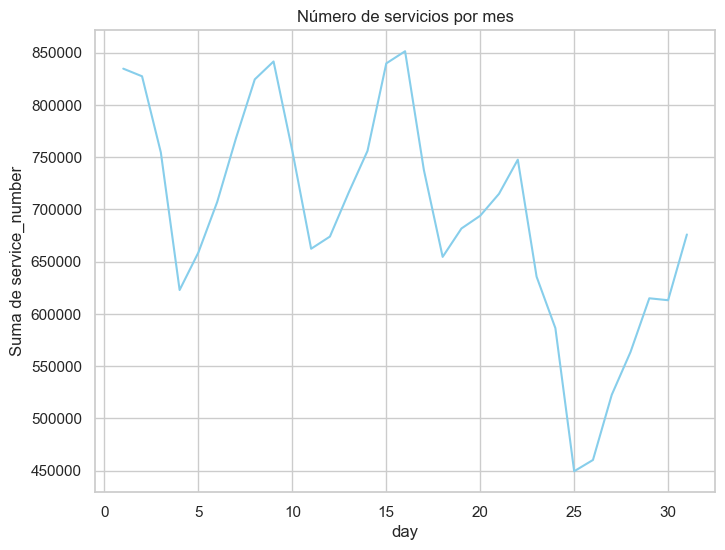

In [71]:
# Agrupar por mes y sumar los valores de 'service_number'
datos_agrupados = Servicios_Agrupados.groupby('day')['service_number'].sum()

# Graficar los datos
plt.figure(figsize=(8, 6))
datos_agrupados.plot(kind='line', color='skyblue')

plt.xlabel('day')
plt.ylabel('Suma de service_number')
plt.title('Número de servicios por mes')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x si es necesario

plt.show()


Es evindete la estacionalidad hacal inicio y final de semana.

### 4. Mapa de calor servicios dia y hora:

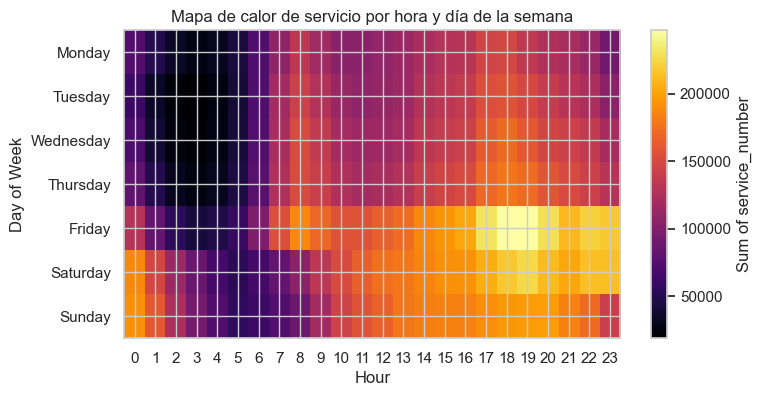

In [83]:
# Especificar el orden de los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear una tabla pivote con días de la semana en filas, horas en columnas y suma de 'service_number' como valores
pivot_table = Servicios_Agrupados.pivot_table(index='day_of_week', columns='hour', values='service_number', aggfunc=np.sum, fill_value=0)
pivot_table = pivot_table.reindex(dias_ordenados)  # Reordenar los días de la semana

# Crear el mapa de calor
plt.figure(figsize=(8, 4))
plt.imshow(pivot_table, cmap='inferno', aspect='auto', vmin=pivot_table.min().min(), vmax=pivot_table.max().max())  # invertir la escala de color

# Añadir etiquetas de los ejes
plt.xlabel('Hour')
plt.ylabel('Day of Week')

# Añadir una barra de colores para interpretar los valores
plt.colorbar(label='Sum of service_number')

# Ajustar las etiquetas de los ejes
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(np.arange(len(pivot_table.index)), pivot_table.index)

plt.title('Mapa de calor de servicio por hora y día de la semana')
plt.show()


### 5. Ubicación de los servicios por Zonas y Distritos:

Demanda por Distrito:

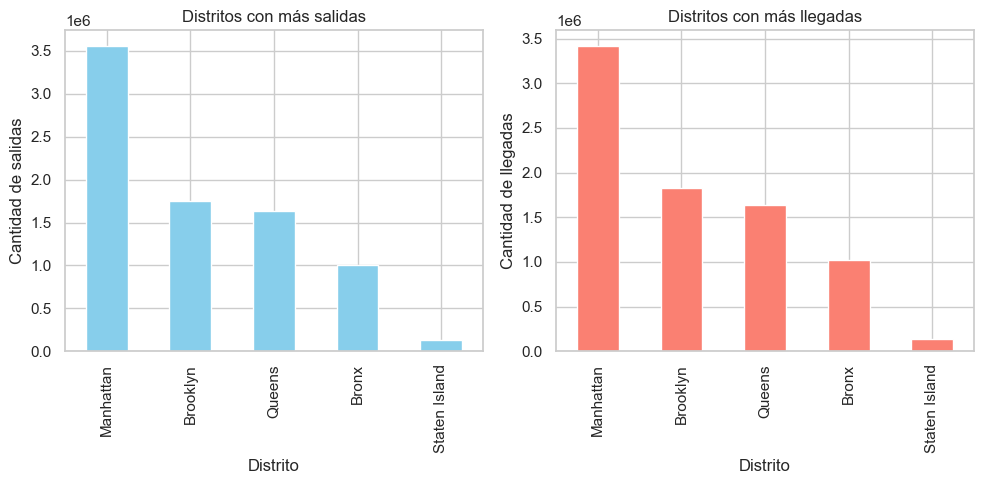

In [96]:
# Fusionar DataFrames para obtener la información de la zona de partida
df_partida = pd.merge(Servicios_Agrupados, Localización, left_on='PULocationID', right_on='LocationID', how='left')

# Fusionar DataFrames para obtener la información de la zona de llegada
df_llegada = pd.merge(Servicios_Agrupados, Localización, left_on='DOLocationID', right_on='LocationID', how='left')

# Calcular la cantidad de salidas por distrito
salidas_por_distrito = df_partida['borough'].value_counts().nlargest(5)

# Calcular la cantidad de llegadas por distrito
llegadas_por_distrito = df_llegada['borough'].value_counts().nlargest(5)

# Crear gráfico de barras para distritos con más salidas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
salidas_por_distrito.plot(kind='bar', color='skyblue')
plt.title('Distritos con más salidas')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de salidas')

# Crear gráfico de barras para distritos con más llegadas
plt.subplot(1, 2, 2)
llegadas_por_distrito.plot(kind='bar', color='salmon')
plt.title('Distritos con más llegadas')
plt.xlabel('Distrito')
plt.ylabel('Cantidad de llegadas')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Demanda por zona:

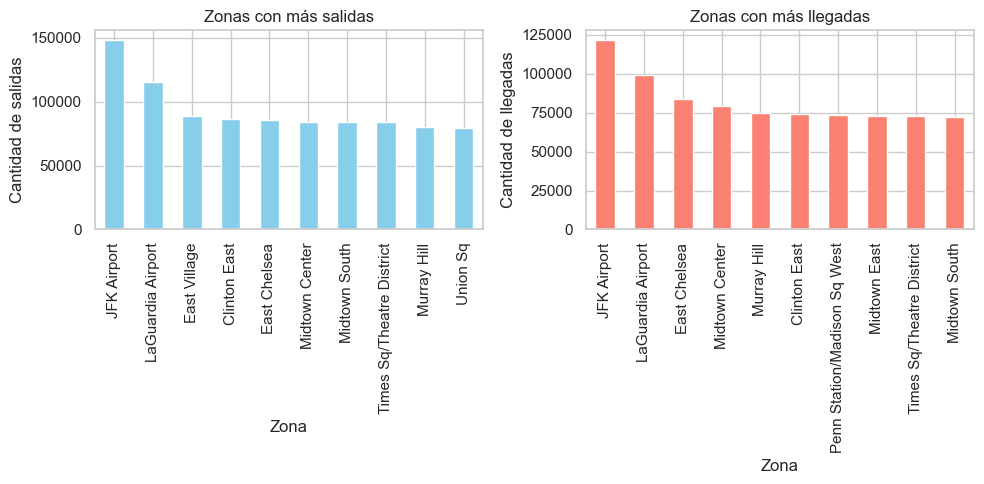

In [100]:
# Fusionar DataFrames para obtener la información de la zona de partida
df_partida = pd.merge(Servicios_Agrupados, Localización, left_on='PULocationID', right_on='LocationID', how='left')

# Fusionar DataFrames para obtener la información de la zona de llegada
df_llegada = pd.merge(Servicios_Agrupados, Localización, left_on='DOLocationID', right_on='LocationID', how='left')

# Calcular la cantidad de salidas por distrito
salidas_por_distrito = df_partida['zone'].value_counts().nlargest(10)

# Calcular la cantidad de llegadas por distrito
llegadas_por_distrito = df_llegada['zone'].value_counts().nlargest(10)

# Crear gráfico de barras para distritos con más salidas
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
salidas_por_distrito.plot(kind='bar', color='skyblue')
plt.title('Zonas con más salidas')
plt.xlabel('Zona')
plt.ylabel('Cantidad de salidas')

# Crear gráfico de barras para distritos con más llegadas
plt.subplot(1, 2, 2)
llegadas_por_distrito.plot(kind='bar', color='salmon')
plt.title('Zonas con más llegadas')
plt.xlabel('Zona')
plt.ylabel('Cantidad de llegadas')

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### 6. Tarifa promedio por tipo de servicio:

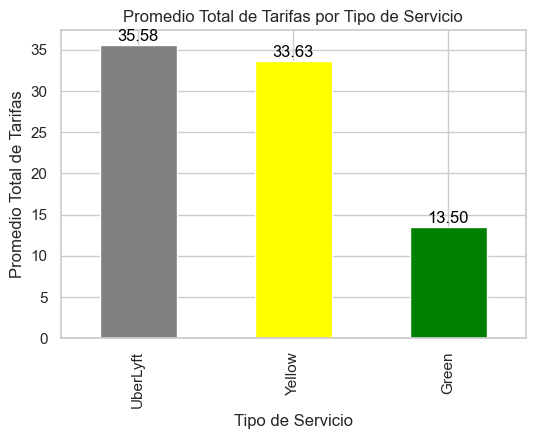

In [109]:
# Agrupar por "service_type" y calcular el promedio de las columnas "base_fare" y "fare_surcharges"
promedio_por_tipo_servicio = Servicios_Agrupados.groupby('service_type')[['base_fare', 'fare_surcharges']].mean()

# Calcular el promedio total sumando los promedios de "base_fare" y "fare_surcharges"
promedio_por_tipo_servicio['promedio_total'] = promedio_por_tipo_servicio.mean(axis=1)

# Definir los colores para cada tipo de servicio
colores = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Ordenar de mayor a menor
promedio_por_tipo_servicio = promedio_por_tipo_servicio.sort_values(by='promedio_total', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = promedio_por_tipo_servicio['promedio_total'].plot(kind='bar', color=[colores.get(x, 'blue') for x in promedio_por_tipo_servicio.index])

# Añadir etiquetas de valor en cada barra con el valor promedio
for i, v in enumerate(promedio_por_tipo_servicio['promedio_total']):
    ax.text(i, v + 0.5, f'{v:.2f}', color='black', ha='center')

# Añadir etiquetas y título
plt.xlabel('Tipo de Servicio')
plt.ylabel('Promedio Total de Tarifas')
plt.title('Promedio Total de Tarifas por Tipo de Servicio')

# Mostrar el gráfico
plt.show()


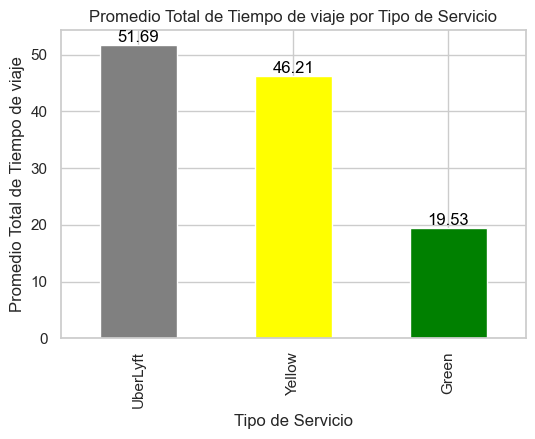

In [113]:

# Agrupar por "service_type" y calcular el promedio de tiempo de viaje
promedio_por_tipo_servicio = Servicios_Agrupados.groupby('service_type')[['travel_time']].mean()

# Calcular el promedio total
promedio_por_tipo_servicio['promedio_total'] = promedio_por_tipo_servicio.mean(axis=1)

# Definir los colores para cada tipo de servicio
colores = {'UberLyft': 'gray', 'Yellow': 'yellow', 'Green': 'green'}

# Ordenar de mayor a menor
promedio_por_tipo_servicio = promedio_por_tipo_servicio.sort_values(by='promedio_total', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
ax = promedio_por_tipo_servicio['promedio_total'].plot(kind='bar', color=[colores.get(x, 'blue') for x in promedio_por_tipo_servicio.index])

# Añadir etiquetas de valor en cada barra con el valor promedio
for i, v in enumerate(promedio_por_tipo_servicio['promedio_total']):
    ax.text(i, v + 0.5, f'{v:.2f}', color='black', ha='center')

# Añadir etiquetas y título
plt.xlabel('Tipo de Servicio')
plt.ylabel('Promedio Total de Tiempo de viaje')
plt.title('Promedio Total de Tiempo de viaje por Tipo de Servicio')

# Mostrar el gráfico
plt.show()